In [ ]:
%cd '/qbio/nest/prom317/tutorial/transcriptomeAlignment/'
import numpy as np
import pandas as pd
import os

homeDirectory = "/qbio/nest/prom317/tutorial/transcriptomeAlignment/"
directoryList = os.listdir(homeDirectory)
print(directoryList)
del directoryList[5]
dataList=[]

def alignAnalyze(samFileName):
    dataColList = list()
    print(samFileName)
    dataColDF = pd.read_csv(samFileName+"/Aligned_results.sam", sep = '\t', header = None)
    print(dataColDF.shape)
    dataColDF.iloc[:,2] = dataColDF.iloc[:,2].map(lambda p : p.split('|')[0])

    return dataColDF.loc[dataColDF.iloc[:,1] != 4].iloc[:,2].value_counts()

dataList.append(alignAnalyze(directoryList[0]))

In [1]:
import numpy as np
import pandas as pd


df = pd.DataFrame({'A':[7,1,5,4,2,1,4,4,8,7,4],'B':[1,2,8,5,3,4,2,6,8,2,4]})
print(df['A'].unique())

[7 1 5 4 2 8]


In [7]:
frame = {'RNAseq_untreated': dataList[5], 'RNAseq_siLuc': dataList[4], 'RNAseq_siLin28a': dataList[0], 'RPF_siLuc': dataList[1], 'RPF_siLin28a': dataList[2], 'CLIP': dataList[3]}
wholeDF = pd.DataFrame(frame)
wholeDF.head()

,RNAseq_untreated,RNAseq_siLuc,RNAseq_siLin28a,RPF_siLuc,RPF_siLin28a,CLIP
ENSMUST00000000001.5,2025.0,1845.0,1513.0,681.0,363.0,2622.0
ENSMUST00000000003.14,1.0,7.0,NaN,NaN,NaN,52.0
ENSMUST00000000010.9,10.0,NaN,4.0,5.0,7.0,95.0
ENSMUST00000000028.14,1192.0,939.0,1029.0,402.0,223.0,697.0
ENSMUST00000000033.12,15.0,1.0,7.0,10.0,14.0,157.0


In [2]:
dataList.append(alignAnalyze(directoryList[1]))

In [3]:
dataList.append(alignAnalyze(directoryList[2]))

In [4]:
dataList.append(alignAnalyze(directoryList[3]))

In [5]:
dataList.append(alignAnalyze(directoryList[4]))

RNAseq_siLuc
(38725543, 15)


In [6]:
dataList.append(alignAnalyze(directoryList[5]))

RNAseq_untreated
(47690315, 15)


In [34]:
wholeDF=wholeDF.fillna(1)
wholeDF_cut = wholeDF.loc[wholeDF["RNAseq_untreated"] > 2000]
print(wholeDF_cut.shape)
wholeDF_cut.head()

(4789, 6)


,RNAseq_untreated,RNAseq_siLuc,RNAseq_siLin28a,RPF_siLuc,RPF_siLin28a,CLIP
ENSMUST00000000001.5,2025.0,1845.0,1513.0,681.0,363.0,2622.0
ENSMUST00000000090.8,2937.0,1591.0,2249.0,4037.0,4221.0,3559.0
ENSMUST00000000137.8,8087.0,6431.0,7064.0,5871.0,4277.0,11233.0
ENSMUST00000000284.7,4054.0,2534.0,3691.0,1497.0,702.0,2245.0
ENSMUST00000000287.9,3575.0,2758.0,4051.0,5934.0,7999.0,7821.0


In [35]:
wholeDF_cut['enrichment']=np.log2(wholeDF_cut['CLIP']/wholeDF_cut['RNAseq_untreated'])
wholeDF_cut['density_change'] = np.log2((wholeDF_cut['RPF_siLin28a']*wholeDF_cut['RNAseq_siLuc'])/(wholeDF_cut['RPF_siLuc']*wholeDF_cut['RNAseq_siLin28a']))
wholeDF_cut.head()

/blaze/prom317/conda/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/blaze/prom317/conda/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RNAseq_untreated,RNAseq_siLuc,RNAseq_siLin28a,RPF_siLuc,RPF_siLin28a,CLIP,enrichment,density_change
ENSMUST00000000001.5,2025.0,1845.0,1513.0,681.0,363.0,2622.0,0.372746,-0.621476
ENSMUST00000000090.8,2937.0,1591.0,2249.0,4037.0,4221.0,3559.0,0.277129,-0.435049
ENSMUST00000000137.8,8087.0,6431.0,7064.0,5871.0,4277.0,11233.0,0.474067,-0.592449
ENSMUST00000000284.7,4054.0,2534.0,3691.0,1497.0,702.0,2245.0,-0.852631,-1.635126
ENSMUST00000000287.9,3575.0,2758.0,4051.0,5934.0,7999.0,7821.0,1.129410,-0.123841


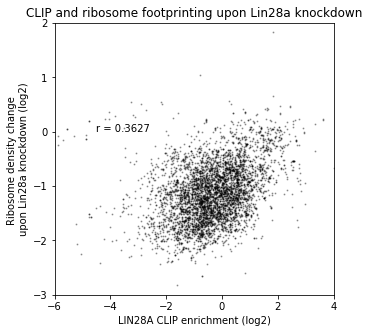

[[1.         0.36277743]
 [0.36277743 1.        ]]


In [38]:
import matplotlib.pyplot as plt
scatter = plt.scatter(x=wholeDF_cut['enrichment'], y=wholeDF_cut['density_change'], c = 'black', alpha = 0.3, s =1)
plt.title('CLIP and ribosome footprinting upon Lin28a knockdown')
plt.xlabel('LIN28A CLIP enrichment (log2)')
plt.ylabel('Ribosome density change \nupon Lin28a knockdown (log2)')
plt.xlim(-6,4)
plt.ylim(-3,2)
plt.yticks([-3,-2,-1,0,1,2])
plt.rcParams['figure.figsize']=(5,5)
plt.text(-4.5,0, 'r = 0.3627')
plt.savefig('CLIP enrichment')
plt.show()

corr = np.corrcoef(wholeDF_cut['enrichment'], wholeDF_cut['density_change'])
print(corr)

In [41]:
uniport = pd.read_csv('/qbio/nest/prom317/tutorial/uniprot-Mus+musculus.tab', sep = '\t')
for idx, row in uniport.iterrows():
    if isinstance(row['Ensembl transcript'], str):
        for ensem in row['Ensembl transcript'].split(';'):
            for dfIdx in wholeDF_cut.index:
                if ensem[0:18] == dfIdx[0:18]:
                    wholeDF_cut.loc[dfIdx,"Gene Ontology"]=row['Gene ontology (cellular component)']

wholeDF_cut.head()

/blaze/prom317/conda/envs/lab/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,RNAseq_untreated,RNAseq_siLuc,RNAseq_siLin28a,RPF_siLuc,RPF_siLin28a,CLIP,enrichment,density_change,Gene Ontology
ENSMUST00000000001.5,2025.0,1845.0,1513.0,681.0,363.0,2622.0,0.372746,-0.621476,centrosome [GO:0005813]; cytoplasm [GO:0005737...
ENSMUST00000000090.8,2937.0,1591.0,2249.0,4037.0,4221.0,3559.0,0.277129,-0.435049,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUST00000000137.8,8087.0,6431.0,7064.0,5871.0,4277.0,11233.0,0.474067,-0.592449,actin cap [GO:0030478]; Arp2/3 protein complex...
ENSMUST00000000284.7,4054.0,2534.0,3691.0,1497.0,702.0,2245.0,-0.852631,-1.635126,NaN
ENSMUST00000000287.9,3575.0,2758.0,4051.0,5934.0,7999.0,7821.0,1.129410,-0.123841,cytosol [GO:0005829]; extracellular region [GO...


In [12]:
wholeDF_cut_dropna = wholeDF_cut.dropna(axis = 0)
wholeDF_cut_dropna.head()

,RNAseq_untreated,RNAseq_siLuc,RNAseq_siLin28a,RPF_siLuc,RPF_siLin28a,CLIP,enrichment,density_change,Gene Ontology
ENSMUST00000000001.5,2025.0,1845.0,1513.0,681.0,363.0,2622.0,0.372746,-0.621476,centrosome [GO:0005813]; cytoplasm [GO:0005737...
ENSMUST00000000090.8,2937.0,1591.0,2249.0,4037.0,4221.0,3559.0,0.277129,-0.435049,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUST00000000122.7,388.0,438.0,1276.0,1126.0,2064.0,641.0,0.724268,-0.668389,cell-cell junction [GO:0005911]; cell surface ...
ENSMUST00000000137.8,8087.0,6431.0,7064.0,5871.0,4277.0,11233.0,0.474067,-0.592449,actin cap [GO:0030478]; Arp2/3 protein complex...
ENSMUST00000000175.6,1921.0,914.0,1394.0,1618.0,1498.0,1496.0,-0.360747,-0.720138,integral component of membrane [GO:0016021]; m...


In [13]:
n = "nucle"
i = "integ"
c = "cyto"
for idx, row in wholeDF_cut_dropna.iterrows():
    if n in row['Gene Ontology']:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = "nucleus"
    elif i in row['Gene Ontology']:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = "integral membrane"
    elif c in row["Gene Ontology"]:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = "cytoplasm"
    elif "mito" in row["Gene Ontology"]:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = "integral membrane"
    elif "endo" in row["Gene Ontology"]:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = "integral membrane"
    elif "ribo" in row["Gene Ontology"]:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = "cytoplasm"
    else:
        wholeDF_cut_dropna.loc[idx, "Gene Ontology"] = np.nan

/blaze/prom317/conda/envs/lab/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ValueError: too many values to unpack (expected 2)

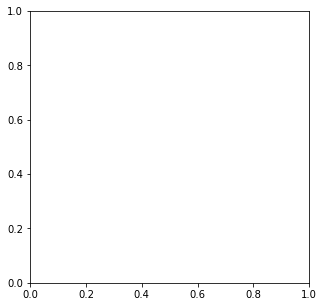

In [40]:
groups = wholeDF_cut_dropna.groupby("Gene Ontology").sample(n=200, random_state=1)
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['enrichment'], group['density_change'], marker = 'o', linestyle = '', label = name, alpha = 0.5, markersize = 1)
ax.legend(loc = "upper left")
plt.title('Linkage to Localization')
plt.xlabel('LIN28A CLIP enrichment (log2)')
plt.ylabel('Ribosome density change upon Lin28a knockdown (log2)')
plt.xlim(-6,4)
plt.ylim(-3, 2)
plt.yticks([-3,-1,0,1,2])
plt.savefig('Linkage')
plt.show()